# **Attack on Titan Final Season Reviews - Tugas Visualisasi Data 8 : Text Visualization**

Nama : Kurniadi Ahmad Wijaya

NIM : 1301194024

Kelas : IF-42-GAB02 / IF-43-09  

## **Introduction**


<img src="https://www.viu.com/ott/id/articles/wp-content/uploads/2020/12/Attack-on-Titan_Slide-Banner.jpg" width=600>

img src : <a src="https://www.viu.com/ott/id/articles/wp-content/uploads/2020/12/Attack-on-Titan_Slide-Banner.jpg">viu </a>

## **Import Library**


In [3]:
import pandas as pd
import warnings
import time

from jikanpy import Jikan
from tqdm import tqdm

warnings.filterwarnings('ignore')

## **Data Crawling**

Base Review Sites : <a href="https://myanimelist.net/anime/38524/Shingeki_no_Kyojin_Season_3_Part_2/reviews">https://myanimelist.net/anime/38524/Shingeki_no_Kyojin_Season_3_Part_2/reviews</a>

Jikan MyAnimeList API Documentation : <a href="https://jikan.docs.apiary.io/">https://jikan.docs.apiary.io/</a>

In [4]:
jikan = Jikan()

reviews = []

for i in tqdm(range(0, 16)):
    result = jikan.anime(40028, extension=f'reviews/{i}')
    review = result.get('reviews')

    for j in range(len(review)):
        reviews.append([review[j].get('content'), review[j].get('date')])

    time.sleep(8)    


100%|██████████| 16/16 [02:17<00:00,  8.60s/it]


In [32]:
df = pd.DataFrame(columns={'text': reviews[0], 'created_at': reviews[1]}, data=reviews)
print(f'Total Data : {len(df)}')

df.to_csv('aot-reviews-end.csv', index=False)
df.sample(8)

Total Data : 320


,text,created_at
79,I mean it's whatever. Some of the episodes jus...,2021-02-01T16:42:00+00:00
134,THIS IS A MASTER PIECE. People might Rant on M...,2021-01-23T21:56:00+00:00
210,I think that my opinion about AoT is quite dif...,2021-03-31T10:35:00+00:00
137,SPOILERS for Attack on Titan seasons 1-3 (and ...,2021-10-22T07:14:00+00:00
209,“The Road to Hell is paved with Good Intention...,2021-03-31T19:04:00+00:00
265,Attack on Titan has been one of the best thing...,2021-07-16T11:13:00+00:00
299,"First, sorry for my English and lack of vocabu...",2021-03-29T08:10:00+00:00
251,This review does not have any spoilers for the...,2020-12-27T22:04:00+00:00


## **Data Preprocessing**

### **Menghapus Data Duplikat**

In [6]:
df.drop_duplicates(subset='text', inplace=True)
df.reset_index(inplace=True)

print(f'Total Data Sisa Penghapusan Duplikasi: {len(df)}')

Total Data Sisa Penghapusan Duplikasi: 299


### **Data Cleansing** 

In [7]:
import re
import string
import nltk
import preprocessor as p

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ShinyQ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ShinyQ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ShinyQ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def tokenizing(text):
    # Mengubah setiap kata menjadi lowercase
    text =  text.lower()

    # Menghapus Link Dengan Pattern http/https dan www
    text = re.sub(r'http\S+', '', text)
    text = re.sub('(@\w+|#\w+)', '', text)

    # Menghapus Tag HTML
    text = re.sub('<.*?>', '', text)

    # Menghapus Tanda Baca Seperti Titik Dan Koma
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))

    # Menghapus Karakter Selain Huruf a-z dan A-Z
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Mengganti baris Baru Dengan Spasi
    text = re.sub("\n", " ", text)

    # Menghapus Karakter Berulang (Contoh: Horeeee!!!! menjadi Hore!)
    text = re.sub(r'(\w)(\1{2,})', r"\1", text)

    # Menghapus 1 Karakter Terpisah
    text = re.sub(r"\b[a-zA-Z]\b", "", text)

    # Menghapus Spasi Yang Lebih Dari Satu
    text = re.sub('(s{2,})', ' ', text)

    # Menggabungkan Setiap Kata
    text = ' '.join(text.split())

    # Mengembalikan Hasil Tokenizing Text
    return text


def lemmatizing_text(text):
    final_text = ''
    words = word_tokenize(text)

    for w in words:
        final_text += lemmatizer.lemmatize(w) + ' '

    return final_text
        

def filtering_text(text):
    custom_word = ['season', 'attack', 'titan']
    temp_text_split = []
    text_split = text.split(' ')

    for i in range(len(text_split)):
        if text_split[i] not in stop_words and len(text_split[i]) > 3 and text_split[i] not in custom_word:
            temp_text_split.append(text_split[i])
    
    temp_text_split = list(set(temp_text_split))
    final_text = ' '.join(temp_text_split)
    return final_text


def tweet_preprocessor(text):
    return p.clean(text)  


df['text'] = df['text'].apply(tokenizing)
df['text'] = df['text'].apply(filtering_text)
df['text'] = df['text'].apply(lemmatizing_text)
df['text'] = df['text'].apply(tweet_preprocessor)


### **Contoh Hasil Proses Preprocessing Data**

In [9]:
df['text'].sample(1).values

array(['theyve fighscenes clich confusing scene scene high gabi decent past character overhyped ence unbearable episode introduction doesnt edremove although make must sakura story extremely start extreme great every skip countle acting well standard previous fit original worst theme eren always seen final season ayane overall heard cringe constant pointed overacting kid others darker charactersof anything time scripting showart voice much'],
      dtype=object)

## **Explorasi Data**

### **Word Cloud**

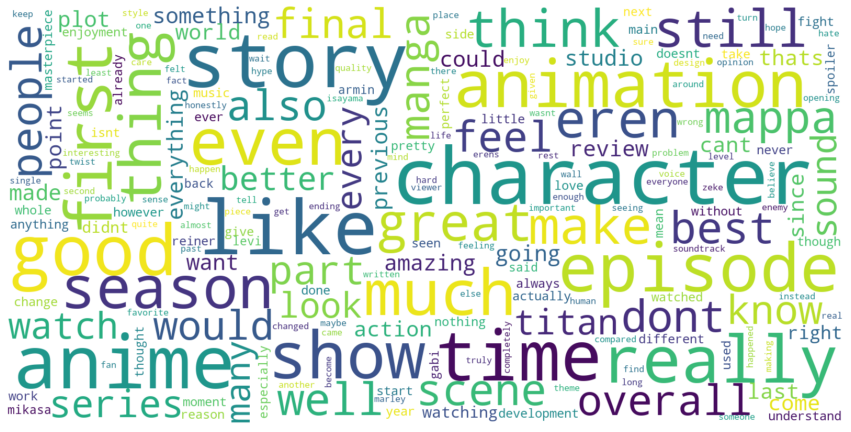

In [10]:
# Inisialisasi Library Yang Akan Digunakan
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.style.use(['ggplot'])

# Inisialisasi Set Untuk Key Kata Dan Value Jumlah Kata
word = {}

# Perulangan Setiap Kata Dan Perhitungannya Dalam Sebuah Dataframe
# Untuk Dimasukkan Kedalam Set
for i in range(len(df)):
    temp_text = df.loc[i]['text']
    temp_split = temp_text.split(' ')
    temp_set = list(set(temp_split))

    for j in range(len(temp_set)):
      try:
        word[temp_set[j]] += 1
      except:
        word[temp_set[j]] = 1

# Menginisialisasi Dan Menampilkan Wordcloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=150, background_color='white').generate_from_frequencies(word)

plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### **Top Word Frequency**

In [11]:
sorted_word = dict(sorted(word.items(), key=lambda item: item[1], reverse=True))
sorted_word = pd.DataFrame(sorted_word.items(), columns=['Word', 'Count'])
sorted_word.set_index('Word', inplace=True)

print(f'Total Data : {len(df)}')
print(f'Total Kata (Unique) : {len(word)}')
sorted_word.head(25)

Total Data : 299
Total Kata (Unique) : 9072


,Count
Word,
character,242
story,227
like,225
anime,217
good,196
time,192
episode,178
animation,169
even,169


### **Words Count Distribution**

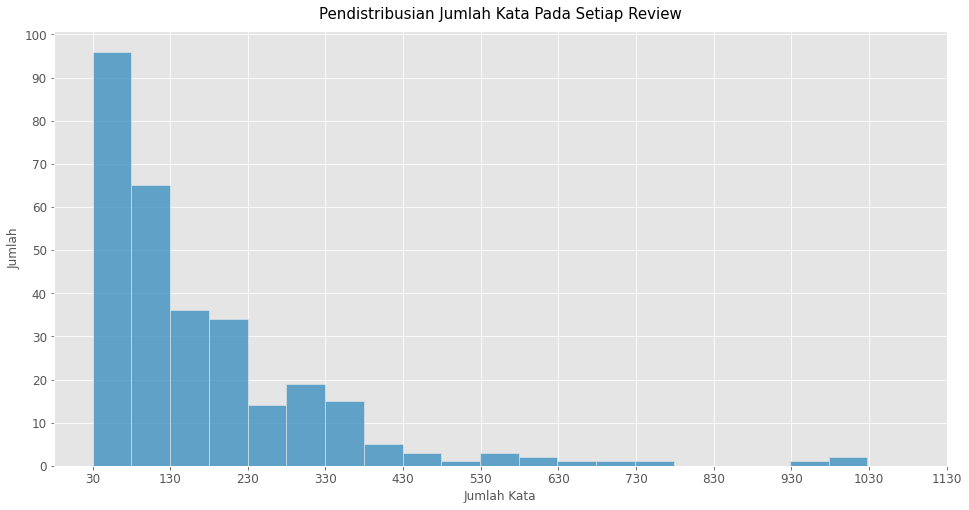

In [30]:
import seaborn as sns
df['word_count'] = df['text'].str.split().str.len()

plt.figure(figsize=(16, 8))
plt.title("Pendistribusian Jumlah Kata Pada Setiap Review", fontsize=15, pad=12)
sns.histplot(x='word_count', data=df, bins=20)
plt.xticks(range(30, 1200, 100))
plt.yticks(range(0, 110, 10))
plt.xlabel("Jumlah Kata")
plt.ylabel("Jumlah")
plt.show()


### **Review Date Trends** 

In [13]:
def get_date(date):
    return date[:10]

df['date'] = df['created_at'].apply(get_date)
df_count = df.groupby(by='date').count().reset_index()

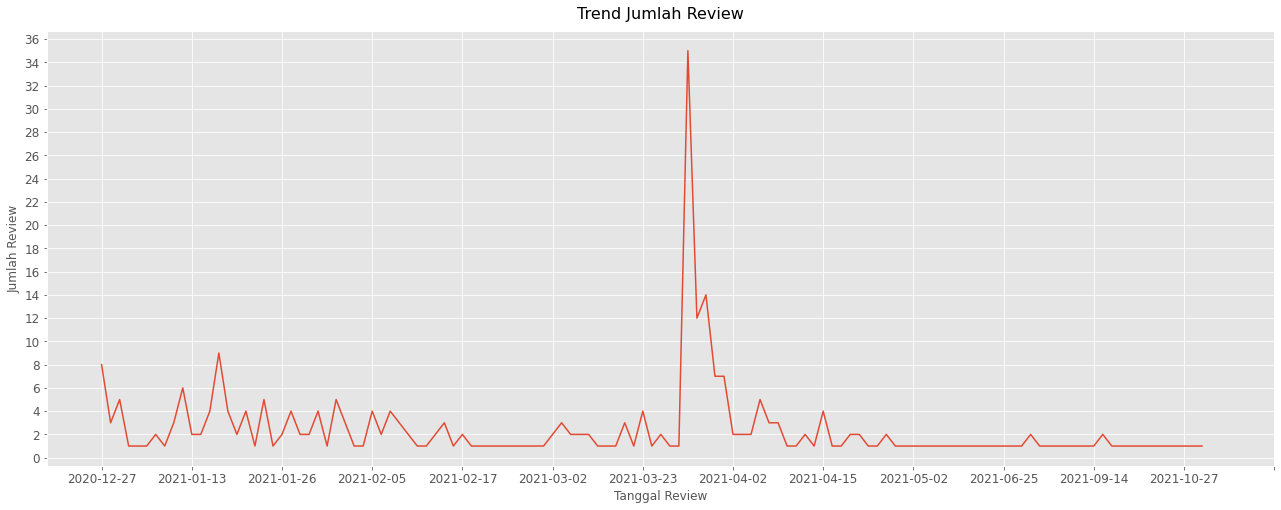

In [21]:
plt.figure(figsize=(22, 8))
plt.title("Trend Jumlah Review", fontsize=16, pad=12)
sns.lineplot(x='date', y='index', data=df_count)

plt.xticks(range(0, 140, 10))
plt.yticks(range(0, 38, 2))

plt.xlabel('Tanggal Review')
plt.ylabel('Jumlah Review')

plt.show()